In [1]:
import numpy as np
import pandas as pd

ƒ (w) = 0.5w2 - 30w +100

*   w = 20
*   lr = 0.01
*   momentum = 0.9

In [2]:
import numpy as np

def revenue_function(w):
    return 0.5 * w**2 - 30 * w + 100

def gradient(w):
    return 0.5 * (2 * w) - 30

def momentum(lr, momen, iter):
    w = 20
    b = 0

    for i in range(iter):
        grad = gradient(w)
        b = momen * b + lr * grad
        w = w - b

        revenue_loss = revenue_function(w)
        print(f"Iteration {i+1}: Price = {w:.4f}, Revenue Loss = {revenue_loss:.4f}")

    return w

lr = 0.1
momen = 0.9
iter = 3

optimal_price = momentum(lr, momen, iter)

print("\nOptimal Price:", optimal_price)


Iteration 1: Price = 21.0000, Revenue Loss = -309.5000
Iteration 2: Price = 22.8000, Revenue Loss = -324.0800
Iteration 3: Price = 25.1400, Revenue Loss = -338.1902

Optimal Price: 25.14


In [3]:
data = pd.read_csv("/content/Healthcare-Diabetes.csv")

In [4]:
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data = data.drop(columns=['Id'])

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from sklearn.preprocessing import MinMaxScaler

columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

for i in columns:
  billing_amount = data[i].values.reshape(-1, 1)
  scaler = MinMaxScaler()
  data[i] = scaler.fit_transform(billing_amount)


In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.318182,0.000000,0.416873,0.234415,50,1
1,0.058824,0.427136,0.540984,0.263636,0.000000,0.330025,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.289082,0.253629,32,1
3,0.058824,0.447236,0.540984,0.209091,0.111111,0.348635,0.038002,21,0
4,0.000000,0.688442,0.327869,0.318182,0.198582,0.534739,0.943638,33,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = data.drop(columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'])
y = data['Outcome']

In [12]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.02,random_state=42)

In [13]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/10
68/68 [==============================] - 2s 6ms/step - loss: 0.6738 - accuracy: 0.6150 - val_loss: 0.6294 - val_accuracy: 0.6519
Epoch 2/10
68/68 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.6980 - val_loss: 0.5370 - val_accuracy: 0.6519
Epoch 3/10
68/68 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.8801 - val_loss: 0.3795 - val_accuracy: 0.9834
Epoch 4/10
68/68 [==============================] - 0s 5ms/step - loss: 0.2986 - accuracy: 0.9654 - val_loss: 0.1891 - val_accuracy: 1.0000
Epoch 5/10
68/68 [==============================] - 1s 8ms/step - loss: 0.1238 - accuracy: 1.0000 - val_loss: 0.0724 - val_accuracy: 1.0000
Epoch 6/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0504 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 7/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 8/10
68/68 [==

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define the model with L1 regularization
model_l1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])

# Define the model with L2 regularization
model_l2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

# Define the model with Elastic Net regularization
model_elastic_net = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the models
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_elastic_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the models
epochs = 10
batch_size = 32

history_l1 = model_l1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
history_l2 = model_l2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
history_elastic_net = model_elastic_net.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the models on the test set
loss_l1, accuracy_l1 = model_l1.evaluate(X_test, y_test)
loss_l2, accuracy_l2 = model_l2.evaluate(X_test, y_test)
loss_elastic_net, accuracy_elastic_net = model_elastic_net.evaluate(X_test, y_test)

print("L1 Regularization - Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss_l1, accuracy_l1))
print("L2 Regularization - Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss_l2, accuracy_l2))
print("Elastic Net Regularization - Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss_elastic_net, accuracy_elastic_net))


Epoch 1/10
56/56 [==============================] - 2s 7ms/step - loss: 3.9852 - accuracy: 0.5991 - val_loss: 3.3193 - val_accuracy: 0.6591
Epoch 2/10
56/56 [==============================] - 0s 4ms/step - loss: 2.8795 - accuracy: 0.6815 - val_loss: 2.4474 - val_accuracy: 0.6591
Epoch 3/10
56/56 [==============================] - 0s 4ms/step - loss: 2.1239 - accuracy: 0.7352 - val_loss: 1.8070 - val_accuracy: 0.6591
Epoch 4/10
56/56 [==============================] - 0s 3ms/step - loss: 1.6082 - accuracy: 0.7335 - val_loss: 1.4128 - val_accuracy: 0.6591
Epoch 5/10
56/56 [==============================] - 0s 4ms/step - loss: 1.3123 - accuracy: 0.7211 - val_loss: 1.2272 - val_accuracy: 1.0000
Epoch 6/10
56/56 [==============================] - 0s 3ms/step - loss: 1.1440 - accuracy: 0.8820 - val_loss: 1.0651 - val_accuracy: 1.0000
Epoch 7/10
56/56 [==============================] - 0s 4ms/step - loss: 0.9866 - accuracy: 0.9808 - val_loss: 0.9191 - val_accuracy: 1.0000
Epoch 8/10
56/56 [==

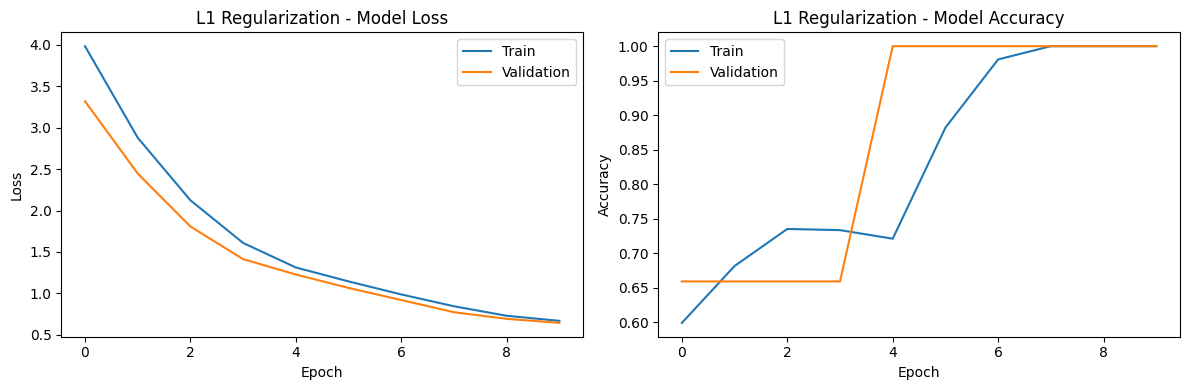

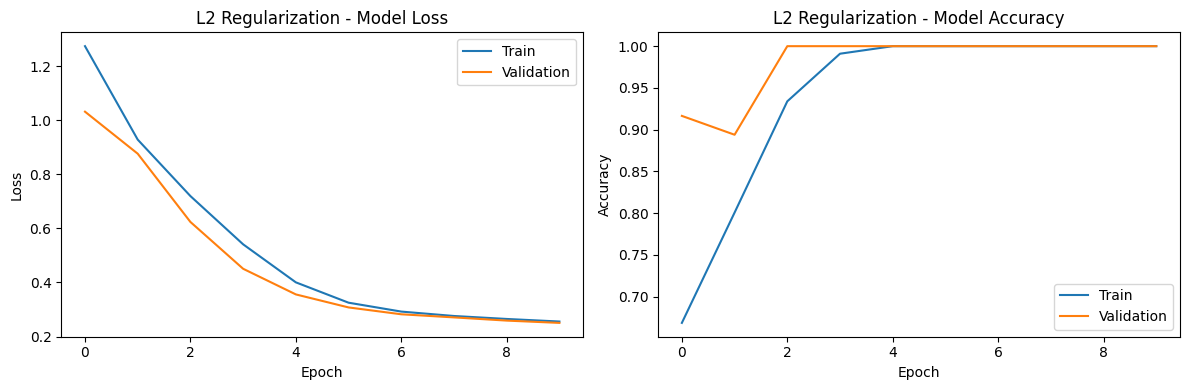

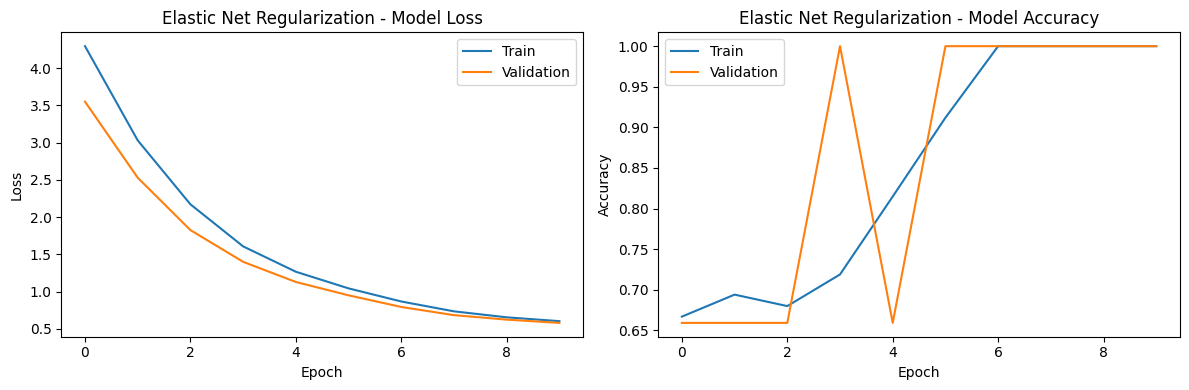

In [15]:
import matplotlib.pyplot as plt

# Plot training history for L1 regularization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_l1.history['loss'], label='Train')
plt.plot(history_l1.history['val_loss'], label='Validation')
plt.title('L1 Regularization - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_l1.history['accuracy'], label='Train')
plt.plot(history_l1.history['val_accuracy'], label='Validation')
plt.title('L1 Regularization - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training history for L2 regularization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_l2.history['loss'], label='Train')
plt.plot(history_l2.history['val_loss'], label='Validation')
plt.title('L2 Regularization - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_l2.history['accuracy'], label='Train')
plt.plot(history_l2.history['val_accuracy'], label='Validation')
plt.title('L2 Regularization - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training history for Elastic Net regularization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_elastic_net.history['loss'], label='Train')
plt.plot(history_elastic_net.history['val_loss'], label='Validation')
plt.title('Elastic Net Regularization - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_elastic_net.history['accuracy'], label='Train')
plt.plot(history_elastic_net.history['val_accuracy'], label='Validation')
plt.title('Elastic Net Regularization - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
